In [82]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
autoreload 2

In [84]:
%matplotlib inline

In [85]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting
import operator


from __future__ import division
#from sympy import init_printing

In [86]:
from estimation_class import *

#Notebook for German Data Estimation with the latest results

##Defining the model and loading the data

In [87]:
est1 = HTWF_Estimation((0.0,1.0), (0.005, 200.0), (0.0,1.0), (0.005, 200.0), 14.0,
                       100000.0)

In [88]:
est1.InitializeFunction()

In [89]:
est1.import_data('forestimation.csv', ID=True, weights=True, logs=False, yearly_w=True, change_weight=True)


Note on the data:
- all variables are given in logs
- wages are annualised by multiplying: (daily wage)*360
- German data has weights to make sample representative of population which are used in the estimation

In [90]:
#Extracting the data and defining tolerance level for the solver
theta,wage,profit,wgt  = est1.data
toll = 1e-4

see Cristina's file for more detailed explanation on the solution method

# Comparing model solution and data for parameters that have worked best so far:

In [91]:
F_params = {'omega_A':0.0307315, 'omega_B':0.24014643, 'sigma_A': 0.83177002 , 'Big_A': 5.06956549}
functions = est1.Solve_Model(F_params, 1000.0, 'lsoda', 4500.0, toll)
w_theta, pi_theta, thetas, xs_fm = functions


Success! All workers and firms are matched


In [101]:
#Plot table with points form estimation - note that we need more points with a low x to get 
#more accurate results - we are working on a log-scale for the grid
est1.current_sol

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.005000,0.005000,0.017912,12935.090952,7.330996e+02
0.205195,0.620749,4.475165,23299.572062,3.299216e+05
0.405390,1.226366,9.509256,25961.147775,7.811316e+05
0.605586,1.831979,14.828339,27670.283846,1.298255e+06
0.805781,2.437587,20.342355,28954.679764,1.863690e+06
1.005976,3.043190,26.006322,29993.579251,2.468090e+06
1.206171,3.648787,31.792872,30870.946223,3.105514e+06
1.406366,4.254378,37.683494,31633.270728,3.771803e+06
1.606562,4.859962,43.664698,32309.190973,4.463857e+06


##Solution for German Data:
This is the best solution for the German data so far, although the minimiser still hasn't finished. 

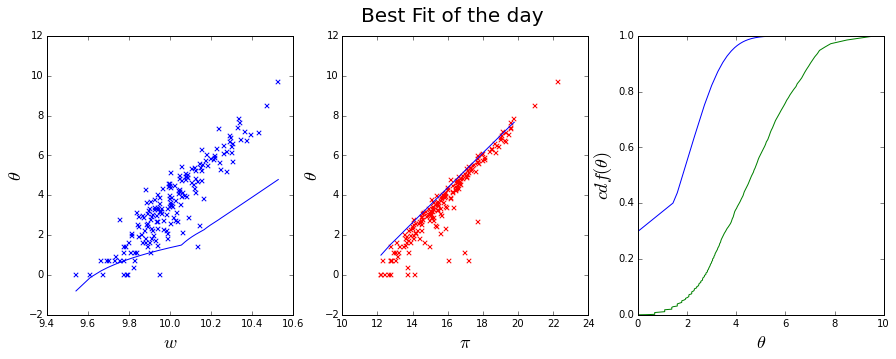

In [99]:
est1.Plot_solution()

#Comments:
- so far model fits the profits quite well and wages seem reasonable
- firm size in the sample is higher than the highest size we get from the estimation
- need more points for low x to get a better approximation at the low end of the cdf, now this is driven by one point which is very small (hence neg. if we take the log)
- Shooting solver is sensitive to initial guess for firm size of largest firms which means that it sometimes does not finish and the solution may take quite long
- Need to find ways to speed up the optimisation

In [97]:
#Error at this point
error = est1.Calculate_MSE(functions,penalty=100)
Total_Error = np.sum(error)
print 'The total SSR = ', Total_Error

errors: 5.8909613976 403.390420394 216.951574031
The total SSR =  626.232955823
